In [31]:
from pathlib import Path
import pickle
path = Path("/media/data/GitHub/simple_hwr/data/online_coordinate_data/3_stroke_64_v2/test_online_coords.pickle")
d = pickle.load(path.open("rb"))

In [32]:
print(len(d))

0


In [ ]:
2+2

In [ ]:
print(4)

In [16]:

times = "4h 11m","2h 22m","2h 43m","2h 59m","3h 39m","3h 32m","3h 36m","2h 30m","3h 4m","4h 14m","1h 51m","4h 7m","3h 24m","2h 52m","1h 57m","3h 50m","3h 39m","4h 32m","4h 42m","5h 44m","2h 52m","2h 41m","1h 41m","5h 16m","2h 54m","2h 43m","2h 30m","2h 50m","6h 20m","2h 0m","3h 5m","2h 32m","3h 12m","3h 3m","3h 53m","2h 19m","1h 54m","4h 11m","2h 15m","2h 25m","2h 21m","2h 18m","2h 39m"

times2 = []
for t in times:
    t = t.replace("h", "").replace("m", "").split(" ")
    times2.append((int(t[0])*60 + int(t[1]) )/60)

In [17]:
print(times2)

[4.183333333333334, 2.3666666666666667, 2.716666666666667, 2.9833333333333334, 3.65, 3.533333333333333, 3.6, 2.5, 3.066666666666667, 4.233333333333333, 1.85, 4.116666666666666, 3.4, 2.8666666666666667, 1.95, 3.8333333333333335, 3.65, 4.533333333333333, 4.7, 5.733333333333333, 2.8666666666666667, 2.683333333333333, 1.6833333333333333, 5.266666666666667, 2.9, 2.716666666666667, 2.5, 2.8333333333333335, 6.333333333333333, 2.0, 3.0833333333333335, 2.533333333333333, 3.2, 3.05, 3.8833333333333333, 2.316666666666667, 1.9, 4.183333333333334, 2.25, 2.4166666666666665, 2.35, 2.3, 2.65]


Mean: 3.1945736434108527
Median: 2.9
Std Dev: 1.03773581380506


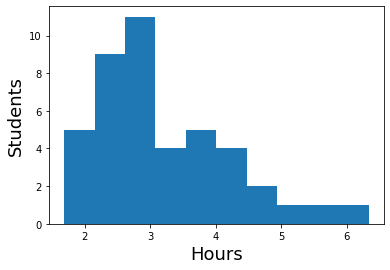

In [28]:
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Students', fontsize=18)

plt.hist(times2)
print("Mean:", np.mean(times2))
print("Median:", np.median(times2))
print("Std Dev:", np.std(times2))

In [36]:
import numpy as np

x =["China Firewall I","IMDB Rating","Checkers","Stock Market I","Video Game Rating","IMDB Revenue","Mass Spec","Story Origin","(NCAA) Basketball","Weather"]
np.random.shuffle(x)
x



['(NCAA) Basketball',
 'IMDB Revenue',
 'Mass Spec',
 'China Firewall I',
 'Video Game Rating',
 'Stock Market I',
 'Checkers',
 'IMDB Rating',
 'Weather',
 'Story Origin']

In [155]:
def pad(list_of_numpy_arrays, lengths=None, variable_length_axis=1):
    list_of_numpy_arrays = [np.asarray(l) for l in list_of_numpy_arrays]
    
    if lengths is None:
        lengths = [l.shape[variable_length_axis] for l in list_of_numpy_arrays]  # only iteration
    dims = list(list_of_numpy_arrays[0].shape)
    maxlen = max(lengths)
    dims[variable_length_axis] = maxlen
    output_dims = len(list_of_numpy_arrays), *dims

    arr = np.zeros(output_dims) # BATCH, VOCAB, LENGTH
    mask = np.arange(maxlen) < np.array(lengths)[:, None]  # BATCH, MAX LENGTH
    print(mask)
    mask = np.tile(mask, (variable_length_axis+1)).reshape(output_dims)
    print(mask)
    print(arr)
    arr[mask] = np.concatenate(list_of_numpy_arrays)  # fast 1d assignment
    return arr

x = [np.array([[1,2,3,4],[4,5,3,5]]),np.array([[1,2,3],[4,5,3]]),np.array([[1,2],[4,5]])]
#x = [[1,2,3],[1,2]]
print(x)
pad(x)

[array([[1, 2, 3, 4],
       [4, 5, 3, 5]]), array([[1, 2, 3],
       [4, 5, 3]]), array([[1, 2],
       [4, 5]])]
[[ True  True  True  True]
 [ True  True  True False]
 [ True  True False False]]
[[[ True  True  True  True]
  [ True  True  True  True]]

 [[ True  True  True False]
  [ True  True  True False]]

 [[ True  True False False]
  [ True  True False False]]]
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 3

In [58]:
x = [4,5,7,8]
del x[2]
print(x)

[4, 5, 8]


In [114]:
x = [[1,2,3],[1,2]]
x = [np.array([[1,2,3,4],[4,5,3,5]]),np.array([[1,2,3],[4,5,3]]),np.array([[1,2],[4,5]])]
# x = [l.transpose(1,0) for l in x]
x = [np.asarray(l) for l in x]
x = np.concatenate(x)
x.transpose(1,0)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 3

In [154]:
def pad(list_of_numpy_arrays, lengths=None, variable_length_axis=1):
    list_of_numpy_arrays = [np.asarray(l) for l in list_of_numpy_arrays]

    if lengths is None:
        lengths = [l.shape[1] for l in list_of_numpy_arrays]  # only iteration
        if variable_length_axis!=0:
            list_of_numpy_arrays = [l.transpose(1,0) for l in list_of_numpy_arrays]
    dims = list(list_of_numpy_arrays[0].shape)
    maxlen = max(lengths)
    dims[0] = maxlen
    output_dims = len(list_of_numpy_arrays), *dims
    arr = np.zeros(output_dims) # BATCH, VOCAB, LENGTH
    mask = np.arange(maxlen) < np.array(lengths)[:, None]  # BATCH, MAX LENGTH
    mask = np.tile(mask, (dims[1])).reshape(output_dims)
    print(mask.shape)
    print(arr.shape)
    print(mask)
    print(arr)
    globals().update(locals())
    arr[mask] = np.concatenate(list_of_numpy_arrays)  # fast 1d assignment
    return arr

x = [np.array([[1,2,3,4],[4,5,3,5]]),np.array([[1,2,3],[4,5,3]]),np.array([[1,2],[4,5]])]
#x = [[1,2,3],[1,2]]
#list_of_numpy_arrays = [np.asarray(l) for l in list_of_numpy_arrays]

print(x)
pad(x, variable_length_axis=1)

[array([[1, 2, 3, 4],
       [4, 5, 3, 5]]), array([[1, 2, 3],
       [4, 5, 3]]), array([[1, 2],
       [4, 5]])]
(3, 4, 2)
(3, 4, 2)
[[[ True  True]
  [ True  True]
  [ True  True]
  [ True  True]]

 [[ True  True]
  [ True False]
  [ True  True]
  [ True False]]

 [[ True  True]
  [False False]
  [ True  True]
  [False False]]]
[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]]


ValueError: zero-dimensional arrays cannot be concatenated

In [138]:
x = [np.array([[1,2,3,4],[4,5,3,5]]),np.array([[1,2,3],[4,5,3]]),np.array([[1,2],[4,5]])]
x = np.array([[1,2,3,4],[4,5,3,5]]).transpose(1,0).reshape(-1)
x

array([1, 4, 2, 5, 3, 3, 4, 5])

In [142]:
x = np.array([[1,2,3,4],[4,5,3,5]]).reshape(-1)
x

array([1, 2, 3, 4, 4, 5, 3, 5])

In [139]:
y = np.concatenate([x, [0,0]])

In [140]:
y.reshape(2,5)

array([[1, 4, 2, 5, 3],
       [3, 4, 5, 0, 0]])

In [150]:
arr[0][mask[0]]
#mask[0]

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [152]:
arr[mask] = 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [160]:
def pad(list_of_numpy_arrays, lengths=None, variable_length_axis=1):
    dims = list(list_of_numpy_arrays[0].shape)

    if lengths is None:
        lengths = [l.shape[variable_length_axis] for l in list_of_numpy_arrays]  # only iteration
    list_of_numpy_arrays = [np.asarray(l).reshape(-1) for l in list_of_numpy_arrays]   
    batch_size = len(list_of_numpy_arrays)
    maxlen = max(lengths)
    dims[variable_length_axis] = maxlen
    output_dims = batch_size, np.product(dims)
    arr = np.zeros(output_dims) # BATCH, VOCAB, LENGTH
    mask = np.arange(maxlen) < np.array(lengths)[:, None]  # BATCH, MAX LENGTH
    mask = np.tile(mask, (variable_length_axis+1)).reshape(output_dims)
    arr[mask] = np.concatenate(list_of_numpy_arrays)  # fast 1d assignment
    return arr.reshape(batch_size, *dims)

x = [np.array([[1,2,3,4],[4,5,3,5]]),np.array([[1,2,3],[4,5,3]]),np.array([[1,2],[4,5]])]
#x = [[1,2,3],[1,2]]
print(x)
pad(x)

[array([[1, 2, 3, 4],
       [4, 5, 3, 5]]), array([[1, 2, 3],
       [4, 5, 3]]), array([[1, 2],
       [4, 5]])]


array([[[1., 2., 3., 4.],
        [4., 5., 3., 5.]],

       [[1., 2., 3., 0.],
        [4., 5., 3., 0.]],

       [[1., 2., 0., 0.],
        [4., 5., 0., 0.]]])

In [161]:
def boolean_indexing(v):
    lens = np.array([len(item) for item in v])
    mask = lens[:,None] > np.arange(lens.max())
    out = np.zeros(mask.shape,dtype=int)
    out[mask] = np.concatenate(v)
    return out

boolean_indexing(x)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 3

In [177]:
np.random.rand(5,5)

array([[0.29475089, 0.58153143, 0.37117601, 0.70773152, 0.30343592],
       [0.12539696, 0.06327324, 0.2935015 , 0.65524754, 0.00750574],
       [0.34836654, 0.64262032, 0.36561937, 0.97984988, 0.11496523],
       [0.5185118 , 0.83427045, 0.56917045, 0.9570811 , 0.43111781],
       [0.90433549, 0.6707148 , 0.27425489, 0.13798813, 0.67712367]])